In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

In [2]:
df= pd.read_csv("India-Rainfall-Dataset.csv")

In [3]:
df

,GHCN_DIN,DATE,PRCP,SNOW,TMAX,TMIN,ELEVATION,NAME,COORD,COUNTRY_CODE\t
0,IN001020700,1/19/2020,NaN,NaN,NaN,20.0,364.0,PBO ANANTAPUR,"14.583,77.633",IN
1,IN001020700,2/3/2020,NaN,NaN,33.5,18.4,364.0,PBO ANANTAPUR,"14.583,77.633",IN
2,IN001020700,2/18/2020,NaN,NaN,34.9,16.3,364.0,PBO ANANTAPUR,"14.583,77.633",IN
3,IN001020700,3/8/2020,NaN,NaN,36.3,24.3,364.0,PBO ANANTAPUR,"14.583,77.633",IN
4,IN001020700,3/16/2020,NaN,NaN,36.7,22.2,364.0,PBO ANANTAPUR,"14.583,77.633",IN
...,...,...,...,...,...,...,...,...,...,...
24893,INM00042071,4/2/2020,NaN,NaN,28.5,NaN,230.4,AMRITSAR,"31.71,74.797",IN
24894,INM00042071,4/17/2020,0.0,NaN,33.6,NaN,230.4,AMRITSAR,"31.71,74.797",IN
24895,INM00042071,5/3/2020,3.0,NaN,32.6,NaN,230.4,AMRITSAR,"31.71,74.797",IN
24896,INM00042071,6/11/2020,NaN,NaN,NaN,23.2,230.4,AMRITSAR,"31.71,74.797",IN


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24898 entries, 0 to 24897
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GHCN_DIN       24898 non-null  object 
 1   DATE           24898 non-null  object 
 2   PRCP           8802 non-null   float64
 3   SNOW           0 non-null      float64
 4   TMAX           11958 non-null  float64
 5   TMIN           22463 non-null  float64
 6   ELEVATION      24898 non-null  float64
 7   NAME           24898 non-null  object 
 8   COORD          24898 non-null  object 
 9   COUNTRY_CODE	  24898 non-null  object 
dtypes: float64(5), object(5)
memory usage: 1.9+ MB


In [5]:
df.describe()

,PRCP,SNOW,TMAX,TMIN,ELEVATION
count,8802.000000,0.0,11958.000000,22463.000000,24898.000000
mean,103.001704,NaN,32.413639,20.444006,293.179838
std,209.832498,NaN,6.069396,6.457309,425.566956
min,0.000000,NaN,1.800000,-6.100000,2.000000
25%,0.000000,NaN,29.700000,16.400000,21.000000
50%,20.000000,NaN,33.300000,22.200000,138.000000
75%,109.000000,NaN,36.100000,25.400000,370.000000
max,2969.000000,NaN,50.000000,33.900000,2311.000000


In [6]:
df.isnull()

,GHCN_DIN,DATE,PRCP,SNOW,TMAX,TMIN,ELEVATION,NAME,COORD,COUNTRY_CODE\t
0,False,False,True,True,True,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False
2,False,False,True,True,False,False,False,False,False,False
3,False,False,True,True,False,False,False,False,False,False
4,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
24893,False,False,True,True,False,True,False,False,False,False
24894,False,False,False,True,False,True,False,False,False,False
24895,False,False,False,True,False,True,False,False,False,False
24896,False,False,True,True,True,False,False,False,False,False


In [7]:
df.isnull().sum()

GHCN_DIN              0
DATE                  0
PRCP              16096
SNOW              24898
TMAX              12940
TMIN               2435
ELEVATION             0
NAME                  0
COORD                 0
COUNTRY_CODE\t        0
dtype: int64

In [8]:
df.drop(columns=['COORD', 'COUNTRY_CODE\t','SNOW','NAME','DATE','GHCN_DIN','ELEVATION'],inplace=True)

In [9]:
df

,PRCP,TMAX,TMIN
0,NaN,NaN,20.0
1,NaN,33.5,18.4
2,NaN,34.9,16.3
3,NaN,36.3,24.3
4,NaN,36.7,22.2
...,...,...,...
24893,NaN,28.5,NaN
24894,0.0,33.6,NaN
24895,3.0,32.6,NaN
24896,NaN,NaN,23.2


In [10]:
for col in ['PRCP', 'TMAX', 'TMIN']:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\THILAKRAJA R\AppData\Local\Temp\ipykernel_37080\3243859999.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [11]:
df

,PRCP,TMAX,TMIN
0,20.0,33.3,20.0
1,20.0,33.5,18.4
2,20.0,34.9,16.3
3,20.0,36.3,24.3
4,20.0,36.7,22.2
...,...,...,...
24893,20.0,28.5,22.2
24894,0.0,33.6,22.2
24895,3.0,32.6,22.2
24896,20.0,33.3,23.2


In [12]:
df.isnull()

,PRCP,TMAX,TMIN
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
24893,False,False,False
24894,False,False,False
24895,False,False,False
24896,False,False,False


In [13]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

In [14]:
print(f'Numerical columns: {numeric_columns}')

Numerical columns: ['PRCP', 'TMAX', 'TMIN']


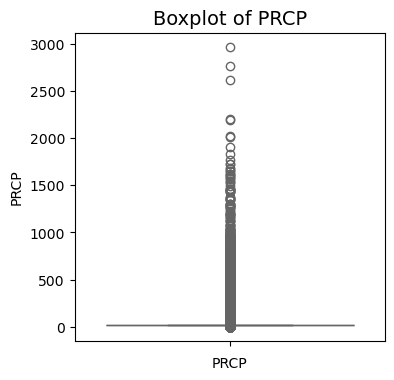

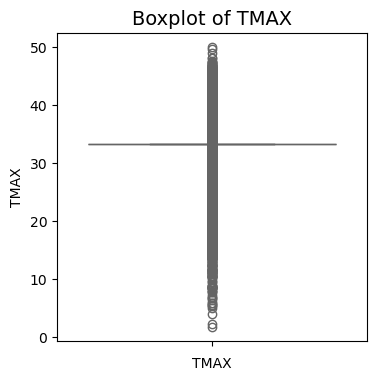

In [15]:
for column in numeric_columns[:-1]:  # Skip 'quality' column
    plt.figure(figsize=(4, 4))
    sns.boxplot(df[column], color='coral')
    plt.title(f"Boxplot of {column}", fontsize=14)
    plt.xlabel(column)
    plt.show()

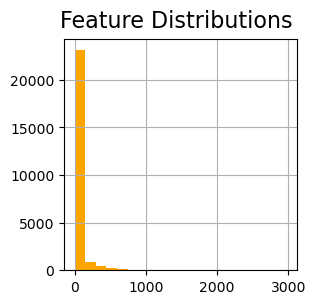

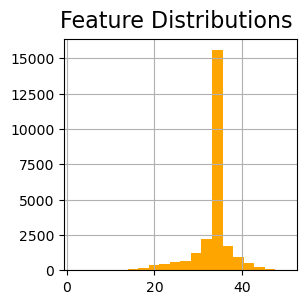

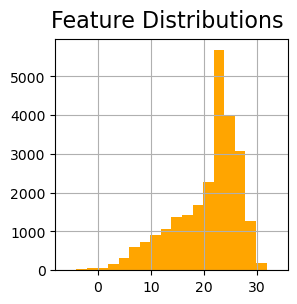

In [16]:

for col in numeric_columns:
    plt.figure()
    df[col].hist(bins=20, figsize=(3,3), color='orange')
    plt.suptitle('Feature Distributions', fontsize=16)
    plt.show()

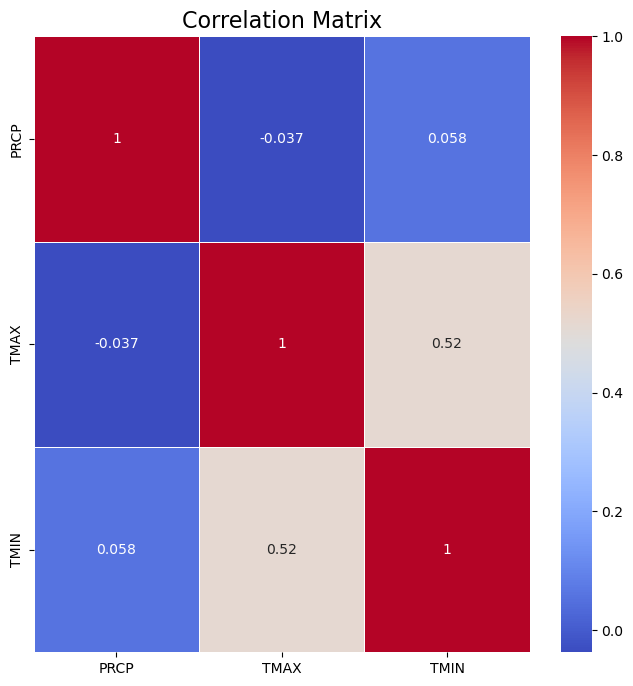

In [17]:
plt.figure(figsize=(8, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [18]:
# Select features for the model (e.g., 'TMAX', 'TMIN', etc.)
X = df[['TMAX', 'TMIN']]  # Replace with your selected features
y = df['PRCP']

In [41]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()

# Fit and transform training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
knn_model = KNeighborsRegressor(n_neighbors=5)
svr_model = SVR(kernel='linear')

In [43]:
# Train models
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)


SVR(kernel='linear')

In [44]:
# Make predictions
lr_predictions = lr_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)
svr_predictions = svr_model.predict(X_test)

In [45]:
models = {
    "Linear Regression": lr_predictions,
    "Decision Tree": dt_predictions,
    "Random Forest": rf_predictions,
     "KNN": knn_predictions,
    "SVR": svr_predictions
   
}


In [46]:
for name, preds in models.items():
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    
    # Convert regression output to classification (threshold based on mean value)
    threshold = y_test.mean()
    class_preds = (preds >= threshold).astype(int)
    y_test_class = (y_test >= threshold).astype(int)

    accuracy = accuracy_score(y_test_class, class_preds)
    precision = precision_score(y_test_class, class_preds)
    recall = recall_score(y_test_class, class_preds)
    f1 = f1_score(y_test_class, class_preds)

    # Print results
    print(f"{name} -> MSE: {mse:.4f}, R²: {r2:.4f}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

Linear Regression -> MSE: 19212.2945, R²: 0.0098, Accuracy: 0.5191, Precision: 0.1841, Recall: 0.7213, F1 Score: 0.2933
Decision Tree -> MSE: 24259.2263, R²: -0.2503, Accuracy: 0.6900, Precision: 0.2156, Recall: 0.4702, F1 Score: 0.2956
Random Forest -> MSE: 19480.7696, R²: -0.0040, Accuracy: 0.6823, Precision: 0.2269, Recall: 0.5385, F1 Score: 0.3193
KNN -> MSE: 19992.3095, R²: -0.0304, Accuracy: 0.7253, Precision: 0.1998, Recall: 0.3280, F1 Score: 0.2484
SVR -> MSE: 20343.8545, R²: -0.0485, Accuracy: 0.8616, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000


C:\Users\THILAKRAJA R\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:
differences = y_test - best_rf_predictions

# Print sample differences
print("Actual vs Predicted Differences:")
print(np.column_stack((y_test[:10], best_rf_predictions[:10], differences[:10])))

Actual vs Predicted Differences:
[[ 30.          83.11581046 -53.11581046]
 [ 20.          24.59579584  -4.59579584]
 [ 20.          82.3954349  -62.3954349 ]
 [ 20.          48.65210504 -28.65210504]
 [ 13.          58.12163177 -45.12163177]
 [ 20.          22.81683699  -2.81683699]
 [ 20.          59.00087449 -39.00087449]
 [ 20.          56.6537999  -36.6537999 ]
 [  0.          83.2848741  -83.2848741 ]
 [130.          72.45853599  57.54146401]]


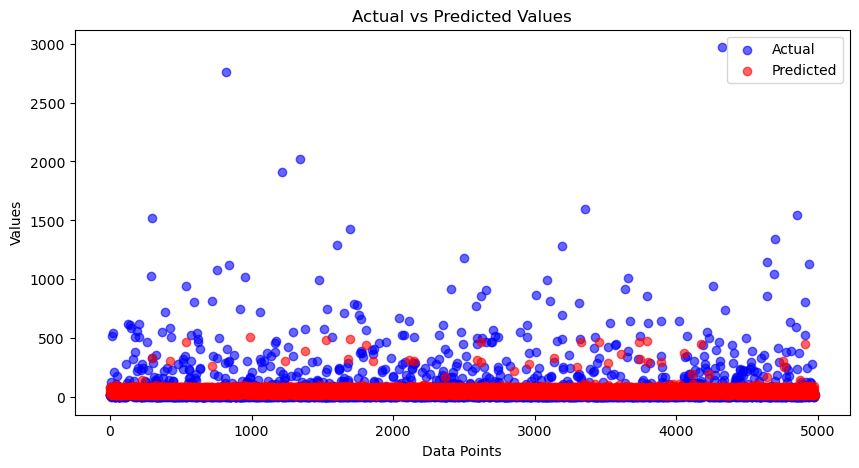

In [48]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, label="Actual", color="blue", alpha=0.6)
plt.scatter(range(len(y_test)), best_rf_predictions, label="Predicted", color="red", alpha=0.6)
plt.legend()
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.title("Actual vs Predicted Values")
plt.show()